## TALLER DE ANALISIS EXPLORATORIO - MBA ADMISSION DATASET
# Natalia Santamaria

Aplicar técnicas de Análisis Exploratorio de Datos (EDA) para entender las distribuciones, relaciones y patrones dentro del conjunto de datos MBA Admission Dataset, Class 2025.

#El set de datos

1. application_id: Unique identifier for each application
2. gender: Applicant's gender (Male, Female)
3. international: International student (TRUE/FALSE)
4. gpa: Grade Point Average of the applicant (on 4.0 scale)
5. major: Undergraduate major (Business, STEM, Humanities)
6. race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
7. gmat: GMAT score of the applicant (800 points)
8. work_exp: Number of years of work experience (Year)
9. work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)
10. admission: Admission status (Admit, Waitlist, Null: Deny)

Ejercicio 1: Cargar los datos y realizar un análisis descriptivo inicial

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive

In [25]:

# 1. Lectura archivo .csv
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/Colab Notebooks/MBA.csv"
df = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
# 2. Inspección inicial de las primeras filas del DataFrame
print(df.shape)
df.head()

(6194, 10)


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [6]:
#2. Análisis descriptivo inicial:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [7]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


Ejercicio 2: Visualización de distribuciones

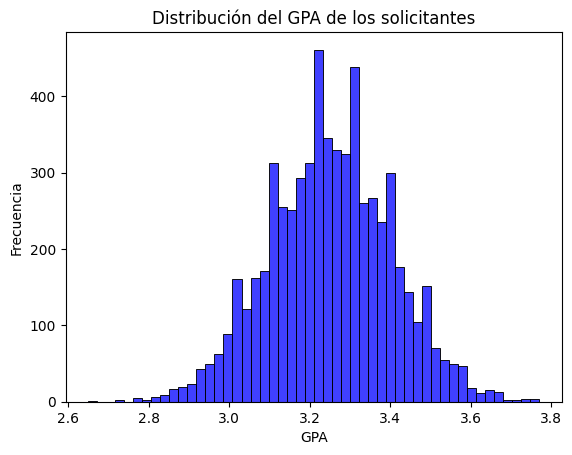

In [15]:
# 1. Distribución de la variable 'gpa':

sns.histplot(df['gpa'], bins=50, color='blue', kde=False) #crear el histograma.
plt.title('Distribución del GPA de los solicitantes') #Agregar titulo
plt.xlabel('GPA') #Agregar xlabel
plt.ylabel('Frecuencia') #Agregar ylabel
plt.show() #mostrar gráfico

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


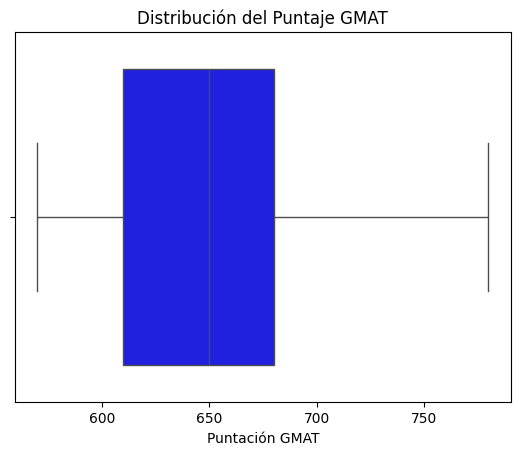

In [21]:
# 2. Distribución de 'gmat':
sns.boxplot(x=df['gmat'], patch_artist=True, color='blue') #crear el boxplor
plt.title('Distribución del Puntaje GMAT') #Agregar titulo
plt.xlabel('Puntación GMAT') #Agregar xlabel
plt.show()

Ejercicio 3: Análisis de valores faltantes y manejo de nulos

In [26]:
# 1. Identificar valores faltantes:
df.isnull().sum()


,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [27]:
# 2. Manejo de valores nulos:
#En race se reemplazaran los valores nulos por "Internacional".
df['race'].fillna('International', inplace=True)
df.isnull().sum()

<ipython-input-27-e701ecb7b2f7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('International', inplace=True)


,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,5194


In [28]:
# 3. Reemplazar nulos en 'gmat' con 0:
df['gmat'].fillna(0, inplace=True)
df.isnull().sum()

<ipython-input-28-ecf1f87687e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gmat'].fillna(0, inplace=True)


,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,5194


In [29]:
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,International,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,International,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,International,590.0,5.0,Other,NaN


Ejercicio 4: Visualización de relaciones entre variables

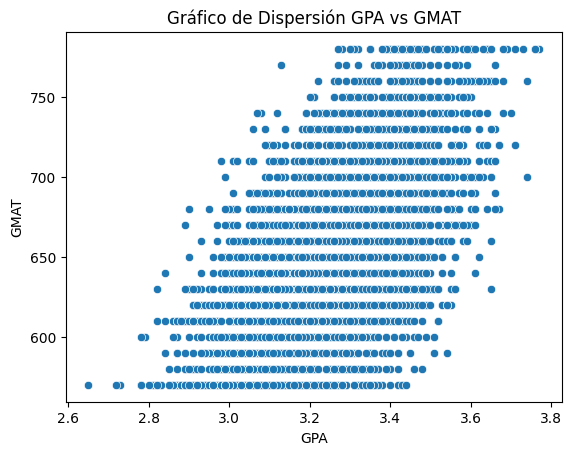

In [30]:
# 1. Relación entre GPA y GMAT:
sns.scatterplot(x='gpa', y='gmat', data=df)
plt.title('Gráfico de Dispersión GPA vs GMAT')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.show()

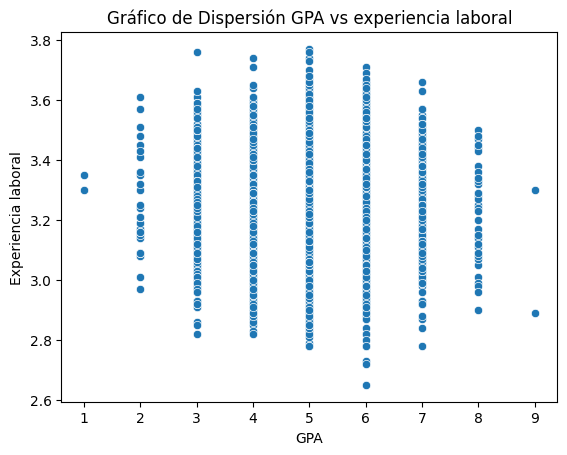

In [32]:
# 2. Relación entre GPA y experiencia laboral:
sns.scatterplot(y='gpa', x='work_exp', data=df)
plt.title('Gráfico de Dispersión GPA vs experiencia laboral')
plt.xlabel('GPA')
plt.ylabel('Experiencia laboral')
plt.show()

Ejercicio 5: Análisis categórico

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


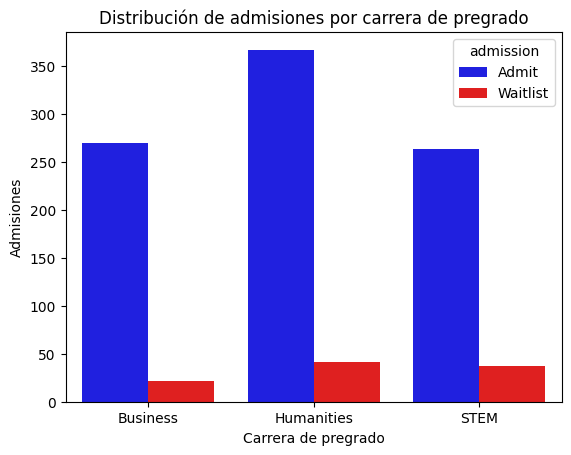

In [33]:
# 1. Distribución de admisiones por carrera de pregrado:
sns.countplot(x='major', hue='admission', data=df, palette=['blue', 'red'])
plt.title('}Admisiones por carrera de pregrado')
plt.xlabel('Carrera de pregrado')
plt.ylabel('Admisiones')
plt.show()

<ipython-input-34-0176b6a6ea82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='international', data=df, palette=['blue', 'red'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


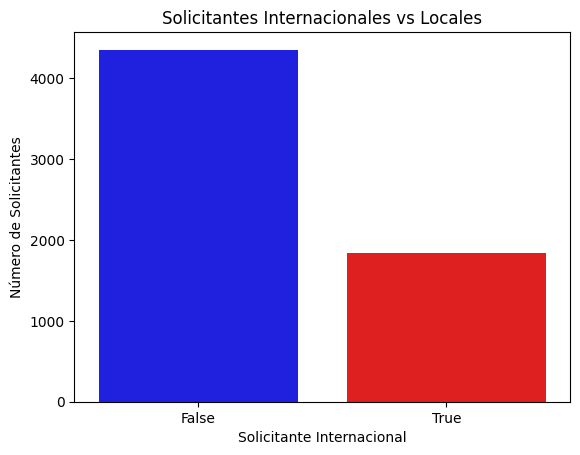

In [34]:
# 2. Distribución de solicitantes internacionales:
sns.countplot(x='international', data=df, palette=['blue', 'red'])
plt.title('Solicitantes Internacionales vs Locales')
plt.xlabel('Solicitante Internacional')
plt.ylabel('Número de Solicitantes')
plt.show()

Ejercicio 6: Detección y manejo de outliers

In [36]:
# 1. Detección de outliers en GPA y GMAT:
# IQR para 'gpa'
Q1_gpa = df['gpa'].quantile(0.25)
Q3_gpa = df['gpa'].quantile(0.75)
IQR_gpa = Q3_gpa - Q1_gpa
lower_bound_gpa = Q1_gpa - 1.5 * IQR_gpa
upper_bound_gpa = Q3_gpa + 1.5 * IQR_gpa
print(lower_bound_gpa)
print(upper_bound_gpa)

2.8499999999999996
3.6500000000000004


In [37]:
# IQR para 'gmat'
Q1_gmat = df['gmat'].quantile(0.25)
Q3_gmat = df['gmat'].quantile(0.75)
IQR_gmat = Q3_gmat - Q1_gmat
lower_bound_gmat = Q1_gmat - 1.5 * IQR_gmat
upper_bound_gmat = Q3_gmat + 1.5 * IQR_gmat
print(lower_bound_gmat)
print(upper_bound_gmat)


505.0
785.0


In [39]:
df2 = df[(df['gpa'] >= lower_bound_gpa) & (df['gpa'] <= upper_bound_gpa)] # Eliminar outliers de 'gpa'

# Eliminar outliers de 'gmat'
df3 = df2[(df2['gmat'] >= lower_bound_gmat) & (df2['gmat'] <= upper_bound_gmat)]

print(f"# Filas iniciales: {df.shape[0]}")
print(f"# Filas después de eliminar outliers: {df3.shape[0]}")

# Filas iniciales: 6194
# Filas después de eliminar outliers: 6150


Ejercicio 7: Reorganizar columnas

In [44]:
# 1. Mover la columna 'admission' al inicio del DataFrame:
columnas = list(df.columns)
print(columnas)
columnas.insert(0, columnas.pop(columnas.index('admission')))
df4 = df.loc[:, columnas]


['application_id', 'gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']


In [45]:
df4

,admission,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
0,Admit,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services
1,NaN,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management
2,Admit,3,Female,True,3.30,Business,International,710.0,5.0,Technology
3,NaN,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology
4,NaN,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting
...,...,...,...,...,...,...,...,...,...,...
6189,NaN,6190,Male,False,3.49,Business,White,640.0,5.0,Other
6190,NaN,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting
6191,Admit,6192,Female,True,3.22,Business,International,680.0,5.0,Health Care
6192,NaN,6193,Male,True,3.36,Business,International,590.0,5.0,Other


Ejercicio 8: Escriba las conclusiones del DataSet

.

